In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [3]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [4]:
plt.style.available

['classic',
 'grayscale',
 'fast',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-dark',
 'seaborn-poster',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-talk',
 'seaborn',
 'seaborn-whitegrid',
 'bmh',
 'seaborn-white',
 'seaborn-paper',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'seaborn-muted',
 'ggplot',
 'Solarize_Light2']

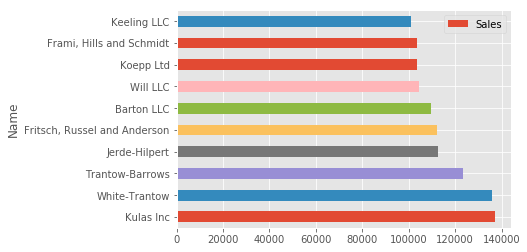

In [5]:
plt.style.use('ggplot')
top_10.plot(kind='barh', y="Sales", x="Name")

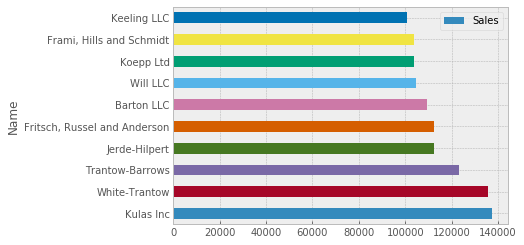

In [6]:
# seaborn
plt.style.use('bmh')
top_10.plot(kind='barh', y="Sales", x="Name")

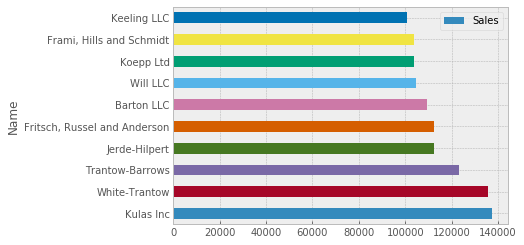

In [9]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

[Text(0,0.5,'Customer'),
 Text(0.5,0,'Total Revenue'),
 Text(0.5,1,'2014 Revenue')]

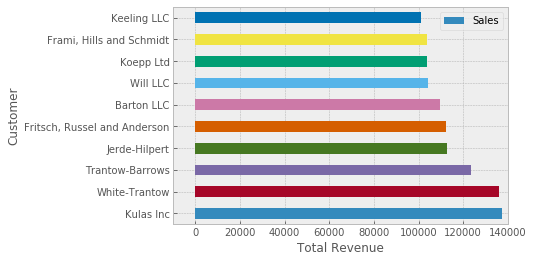

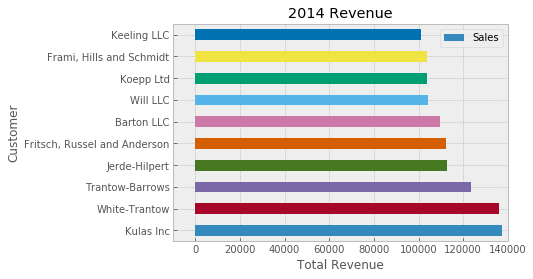

In [12]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

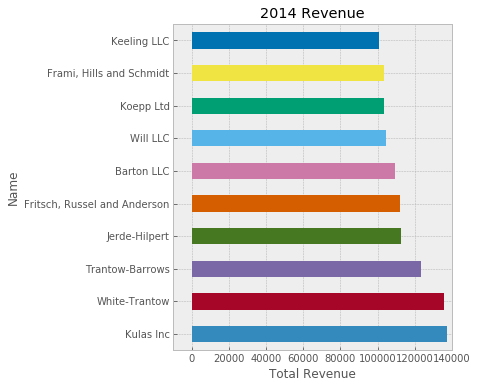

In [13]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

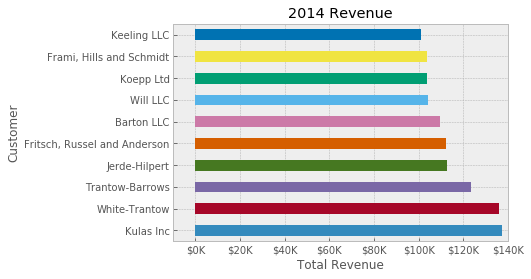

In [14]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

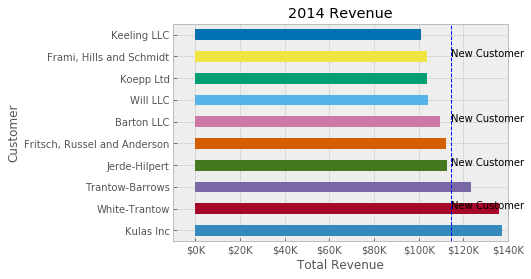

In [17]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [1,3, 5, 8]:
    ax.text(avg, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

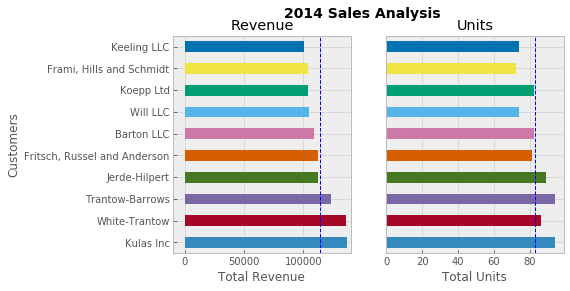

In [18]:
# fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

In [20]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

In [21]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

In [23]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
file_location = "./data.xlsx"
workbook = xlrd.open_workbook(file_location)
first_sheet = workbook.sheet_by_index(0)


In [33]:
from io import BytesIO
import matplotlib.pyplot as plt
from xlwt import Workbook
w = Workbook()
ws = w.add_sheet('Image')
# ws.insert_bitmap(file_out, 0, 0)

imgdata = BytesIO()
fig.savefig(imgdata, format="png")
imgdata.seek(0)
ws.insert_image(
    0, 0, imgdata
)
w.save('images.xls')

AttributeError: 'Worksheet' object has no attribute 'insert_image'

In [30]:
import xlsxwriter
 
book = xlsxwriter.Workbook('pict.xlsx')
sheet = book.add_worksheet('demo')
sheet.insert_image('D4','sales.png')
book.close()

In [30]:
from xlwt import Workbook
w = Workbook()
ws = w.add_sheet('Image')
ws.insert_bitmap(file_out, 0, 0)
w.save('images.xls')


In [47]:
import io
from PIL import Image
import xlsxwriter

workbook = xlsxwriter.Workbook('image_scaled.xlsx')
worksheet = workbook.add_worksheet()

image_width = 140.0
image_height = 182.0

cell_width = 64.0
cell_height = 20.0

x_scale = cell_width/image_width * 10
y_scale = cell_height/image_height * 10
# x_scale = cell_width
# y_scale = cell_height
# 
# worksheet.insert_image('B2', 'sales.png',
#                        {'x_scale': x_scale, 'y_scale': y_scale})


def get_resized_image_data(file_path, bound_width_height):
    # get the image and resize it
    im = Image.open(file_path)
    # im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking

    # stuff the image data into a bytestream that excel can read
    im_bytes = io.BytesIO()
    im.save(im_bytes, format='PNG')
    return im_bytes

# use with xlsxwriter
image_path = 'sales.png'
bound_width_height = (240, 240)
image_data = get_resized_image_data(image_path, bound_width_height)

# sanity check: remove these three lines if they cause problems
im = Image.open(image_data)
# im.show()  # test if it worked so far - it does for me
im.seek(0)  # reset the "file" for excel to read it.
# worksheet.insert_image('B5', 'python.png', {'image_data': image_data})
worksheet.insert_image('B5', image_path, {'image_data': image_data,})
worksheet.insert_image('B20', image_path, {'image_data': image_data,})
workbook.close()